In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

# The Normal Probability Distribution

Later in the semester we will give a result that at least partially explains why the Normal Probability Distribution is as important as it is. It seems to show up in examples all the time. Today we will give some examples of problems that typically have a normal distribution.

## Definition: Normal Probability Distribution

A random variable Y is said to have a normal probability distirbution if, for $\sigma > 0$ and $-\infty < \mu < \infty$, the density function of Y is:

$$ f(y) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(y-\mu)^2/(2\sigma^2) } $$

Notice the two parameters $\mu$ and $\sigma$, whose names have been suggestively choosen. Indeed we have:

$$ \mu = E(Y) $$

and 

$$ \sigma^2 = V(Y) = E( (Y-\mu)^2 ) $$

Hence: $\mu$ controls the center of the distribution and $\sigma$ adjusts the spread. 

In [15]:
def plot_normal_pdf(mu, sigma, ymin=-10, ymax=10, n=1000):

    h = (ymax - ymin)/n
    yy = np.arange(ymin, ymax, h)
    
    f = 1/(sigma*np.sqrt(2*np.pi)) * exp( -(yy-mu)**2/(2*sigma**2))
    
    plt.figure(figsize=(12, 7))
    plt.plot(yy, f, 'b-');
    
    return 1

1

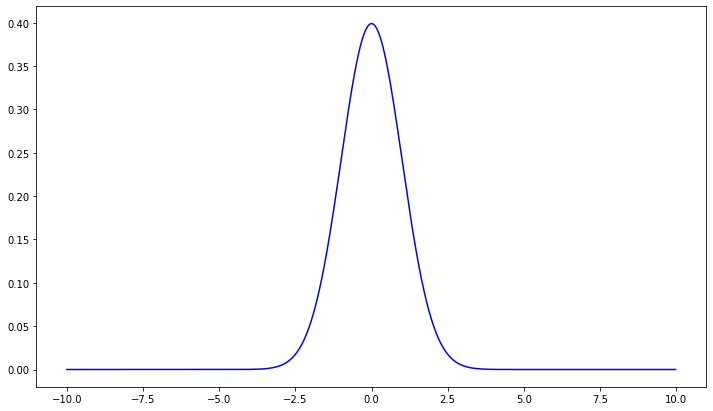

In [34]:
plot_normal_pdf(0, 1)

In [37]:
def plot_normal_cdf(mu, sigma, ymin=-10, ymax=10, n=1000):

    h = (ymax - ymin)/n
    yy = np.arange(ymin, ymax, h)
    
    f = 1/(sigma*np.sqrt(2*np.pi)) * exp( -(yy-mu)**2/(2*sigma**2))
    F = []
    for k in range(len(f)):
        F += [ sum(f[:k])*h ]
    
    
    plt.figure(figsize=(12, 7))
    plt.plot(yy, F, 'b-');
    
    return 1

1

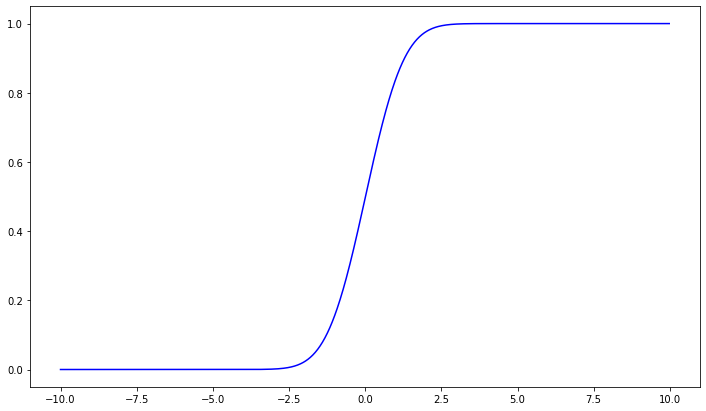

In [38]:
plot_normal_cdf(0, 1)

## Computing Probabilities for Normal Random Variables

A historical problem for Normal Random Variables was computing the necessary integrals. Until recently people worked with tables of values or computerized look up tables for the integerals. However now we all have access to computers to find these values or at least their approximations.

Note. There are techniques for computing integrals of $f(y)$ exactly at least when the end points are rational multiples of $\sigma$ added to $\mu$, however they rely on Fourier Transforms and are beyond the scope of our class as well as being completely unnecessary for any real application.

### Example
Let Z be the normal random variable with mean 0 and standard deviation 1. (Note that we will use Z for this *standard normal random variable* from now on).

1. Find $P(Z \geq 2)$

2. Find $P(-2 \leq Z \leq 2 ) $

3. Find $P(0 \leq Z \leq 1.73) $

In [43]:
# We will use scipy.integrate to compute the necessary integrals.
import scipy.integrate as integrate

# Note if you are using both the numerical integration routine
# from scipy, and the symbolic routine from sympy you will want to be 
# careful how you import them and either keep them in their parent 
# modules or use an alias.

In [41]:
# to use scipy.integrate we need to define our integrand as a Python
# function
def f(y):
    return 1/np.sqrt(2*np.pi) * exp(-y**2 / 2)


In [52]:
# Integrate comes with a number of numerical integration routines.
# We will use the basic integrate.quad for quadrature.

# The second problem is that we want to compute the integral from 2 to 
# infinity, but we can't do that. What we will need to do 
# is compute the integral for increasing values of the upper bound
# and see if we can conclude the answer is converging.

integrate.quad(f, 2, 10)
# The first number in the output is the approximate integral, and the
# second value is an estimate of the error. Adjust the upper bound 
# to check that we have gone out far enough.

(0.022750131948179216, 9.624503215680349e-14)

## Example: Heights

The mean heights of men in the US are 70 inches with a standard deviation of 3 inches, while the heights of adult women are distributed with a mean of 64.5 inches and a standard deviation of 2.5 inches.

Find the probablity of a man having a height of more than 80 inches. 

Find the probablity of a women having a hiehgt of more than 80 inches.

We could compute the necessary integrals directly using the formulas from the beginning of class for the PDF. However another approach would be to convert the values in this problem to the *Standard Normal Random Variable* Z. 